# Shooting Guards NBA Clustering with KMeans

Through this notebook I will perform clustering over NBA Shooting Guards data to try to identifies the different play
style.

In [58]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, OPTICS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

In [59]:
players_data = pd.read_csv('PlayersAdvStats.csv')
shooting_guards_data = players_data[players_data['position'] == 'SG']
del shooting_guards_data['position']
del shooting_guards_data['team_id']
shooting_guards_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,Kyle,Korver,1838.73,9.54,3.46,4.54,8.00,1.88,5.00,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
12,202323,Evan,Turner,1600.17,9.19,3.74,5.02,8.76,0.21,1.45,...,0.44,0.20,0.02,2.47,16.52,0.93,18.00,22.99,1.74,18.96
13,202340,Avery,Bradley,1963.40,14.76,5.78,7.43,13.22,1.95,5.43,...,0.51,0.12,0.15,2.11,6.68,0.66,9.48,10.12,2.41,20.44
18,203935,Marcus,Smart,1634.77,8.50,2.96,6.04,9.00,0.77,3.82,...,0.37,0.29,0.09,5.85,12.20,1.06,10.78,16.92,2.99,18.15
22,2747,J.R.,Smith,1758.54,12.11,4.51,6.51,11.03,2.34,6.20,...,0.52,0.11,0.21,2.62,8.81,0.75,6.26,8.97,1.90,19.75
27,201569,Eric,Gordon,2013.85,14.88,5.00,7.22,12.22,2.50,6.60,...,0.51,0.22,0.20,0.86,7.05,0.75,10.52,15.78,1.54,24.44
43,202710,Jimmy,Butler,2249.60,22.07,7.28,9.05,16.32,1.02,3.45,...,0.48,0.48,0.06,3.18,10.66,1.53,9.29,18.25,2.37,25.01
44,202734,E'Twaun,Moore,867.17,4.21,1.76,2.10,3.86,0.31,0.93,...,0.50,0.17,0.08,1.29,9.54,0.71,11.73,8.22,1.75,14.00
57,200751,Randy,Foye,1195.74,6.02,2.16,4.23,6.39,0.88,3.21,...,0.41,0.15,0.14,1.84,8.85,1.11,14.07,16.30,1.32,18.21
61,203115,Will,Barton,1725.61,15.28,5.56,7.05,12.61,1.60,4.26,...,0.50,0.24,0.13,3.55,21.27,1.19,10.33,15.43,1.70,24.70


In [60]:
X_sg_unscaled = shooting_guards_data.drop(['player_id', 'first_name', 'last_name'], 1)
scaler_sg = StandardScaler()
scaler_sg.fit(X_sg_unscaled)
X_sg = scaler_sg.transform(X_sg_unscaled)

When we have the input data scaled we need to run K-Means with different clusters numbers and print the elbow curve to
identify the optimal value of clusters' numbers.

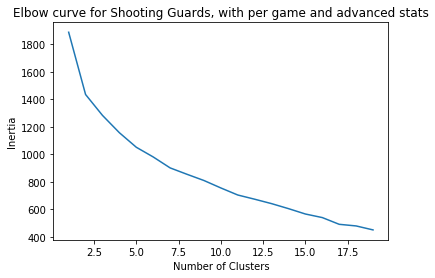

In [61]:
cluster_number = range(1, 20)
sg_kmeans_models = [KMeans(n_clusters=i) for i in cluster_number]
sg_inertia = [sg_kmeans_models[i].fit(X_sg).inertia_ for i in range(len(sg_kmeans_models))]
plt.plot(cluster_number, sg_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Shooting Guards, with per game and advanced stats')
plt.savefig('Figures/SG/sg-kmeans-full.png')
plt.show()

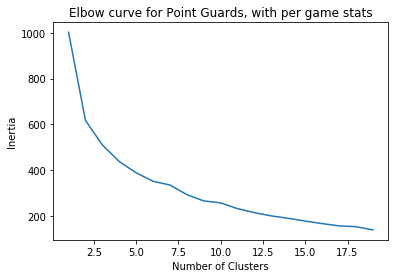

In [62]:
X_sg_per_game_unscaled = shooting_guards_data.copy()
X_sg_per_game_unscaled = X_sg_per_game_unscaled.drop(['player_id', 'first_name', 'last_name', 'OffRtg', 'Floor%',
                                                      'DefRtg', 'NetRtg', 'TS%', 'eFG%', 'FTARate', '3FGARate',
                                                      'OR%', 'DR%', 'BLK%', 'TOV%', 'AST%', 'STL%', 'USG%'], 1)
scaler_sg_per_game = StandardScaler()
scaler_sg_per_game.fit(X_sg_per_game_unscaled)
X_sg_per_game = scaler_sg_per_game.transform(X_sg_per_game_unscaled)

sg_kmeans_models_per_game = [KMeans(n_clusters=i) for i in cluster_number]
sg_inertia_per_game = [sg_kmeans_models_per_game[i].fit(X_sg_per_game).inertia_
                       for i in range(len(sg_kmeans_models_per_game))]
plt.plot(cluster_number, sg_inertia_per_game)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with per game stats')
plt.savefig('Figures/SG/sg-kmeans-per-game.png')
plt.show()

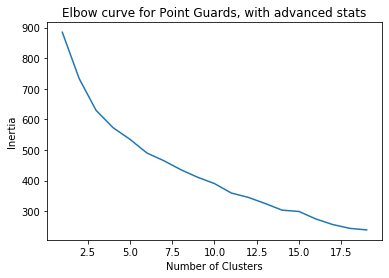

In [63]:
X_sg_advanced_unscaled = shooting_guards_data.copy()
X_sg_advanced_unscaled = X_sg_advanced_unscaled.drop(['player_id', 'first_name', 'last_name', 'played_minutes_per_game',
                                                      'scored_points_per_game', 'field_goals_made_per_game',
                                                      'field_goals_miss_per_game', 'field_goals_attempts_per_game',
                                                      'three_points_field_goals_made_per_game',
                                                      'three_points_field_goals_attempts_per_game',
                                                      'free_throws_made_per_game', 'free_throws_miss_per_game',
                                                      'free_throws_attempts_per_game', 'assists_per_game',
                                                      'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
                                                      'steals_per_game', 'blocks_per_game', 'turnovers_per_game',
                                                      'personal_fouls_per_game'], 1)
scaler_sg_advanced = StandardScaler()
scaler_sg_advanced.fit(X_sg_advanced_unscaled)
X_sg_advanced = scaler_sg_advanced.transform(X_sg_advanced_unscaled)

sg_kmeans_models_advanced = [KMeans(n_clusters=i) for i in cluster_number]
sg_inertia_advanced = [sg_kmeans_models_advanced[i].fit(X_sg_advanced).inertia_ for i in range(len(sg_kmeans_models_advanced))]
plt.plot(cluster_number, sg_inertia_advanced)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with advanced stats')
plt.savefig('Figures/SG/sg-kmeans-advanced.png')
plt.show()

Analyzing the elbow curves we can conclude:
* For all statistics input the best number of clusters is 6.
* For per game statistics input the best number of clusters is 5.
* For advanced statistics input the best number of clusters is 6.

Now we build the models and compute the clusters and the analyze the cluster to evaluate which player aggrupation is
more logical.

In [64]:
# KMeans_sg_full = KMeans(n_clusters=6, n_init=20).fit(X_sg)
# joblib.dump(KMeans_sg_full, 'Models/kmeans_sg_full.sav')

KMeans_sg_full = joblib.load('Models/kmeans_sg_full.sav')

sg_full_predicted_classes = KMeans_sg_full.predict(X_sg)
sg_full = shooting_guards_data.copy()
sg_full.insert(1, 'Cluster', sg_full_predicted_classes)
sg_full

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,0,Kyle,Korver,1838.73,9.54,3.46,4.54,8.00,1.88,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
12,202323,5,Evan,Turner,1600.17,9.19,3.74,5.02,8.76,0.21,...,0.44,0.20,0.02,2.47,16.52,0.93,18.00,22.99,1.74,18.96
13,202340,0,Avery,Bradley,1963.40,14.76,5.78,7.43,13.22,1.95,...,0.51,0.12,0.15,2.11,6.68,0.66,9.48,10.12,2.41,20.44
18,203935,4,Marcus,Smart,1634.77,8.50,2.96,6.04,9.00,0.77,...,0.37,0.29,0.09,5.85,12.20,1.06,10.78,16.92,2.99,18.15
22,2747,0,J.R.,Smith,1758.54,12.11,4.51,6.51,11.03,2.34,...,0.52,0.11,0.21,2.62,8.81,0.75,6.26,8.97,1.90,19.75
27,201569,0,Eric,Gordon,2013.85,14.88,5.00,7.22,12.22,2.50,...,0.51,0.22,0.20,0.86,7.05,0.75,10.52,15.78,1.54,24.44
43,202710,1,Jimmy,Butler,2249.60,22.07,7.28,9.05,16.32,1.02,...,0.48,0.48,0.06,3.18,10.66,1.53,9.29,18.25,2.37,25.01
44,202734,2,E'Twaun,Moore,867.17,4.21,1.76,2.10,3.86,0.31,...,0.50,0.17,0.08,1.29,9.54,0.71,11.73,8.22,1.75,14.00
57,200751,3,Randy,Foye,1195.74,6.02,2.16,4.23,6.39,0.88,...,0.41,0.15,0.14,1.84,8.85,1.11,14.07,16.30,1.32,18.21
61,203115,5,Will,Barton,1725.61,15.28,5.56,7.05,12.61,1.60,...,0.50,0.24,0.13,3.55,21.27,1.19,10.33,15.43,1.70,24.70


In [65]:
sg_full_cluster_size = pd.DataFrame()
sg_full_cluster_size['Cluster'] = [0, 1, 2, 3, 4, 5]
sg_full_cluster_size['Players'] = sg_full.groupby('Cluster').size()
sg_full_cluster_size

,Cluster,Players
0,0,20
1,1,4
2,2,14
3,3,5
4,4,2
5,5,14


In [92]:
# KMeans_sg_per_game = KMeans(n_clusters=5, n_init=20).fit(X_sg_per_game)
# joblib.dump(KMeans_sg_per_game, 'Models/kmeans_sg_per_game.sav')

KMeans_sg_per_game = joblib.load('Models/kmeans_sg_per_game.sav')

sg_per_game_predicted_classes = KMeans_sg_per_game.predict(X_sg_per_game)
sg_per_game = shooting_guards_data.copy()
sg_per_game.insert(1, 'Cluster', sg_per_game_predicted_classes)
sg_per_game

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,4,Kyle,Korver,1838.73,9.54,3.46,4.54,8.00,1.88,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
12,202323,0,Evan,Turner,1600.17,9.19,3.74,5.02,8.76,0.21,...,0.44,0.20,0.02,2.47,16.52,0.93,18.00,22.99,1.74,18.96
13,202340,3,Avery,Bradley,1963.40,14.76,5.78,7.43,13.22,1.95,...,0.51,0.12,0.15,2.11,6.68,0.66,9.48,10.12,2.41,20.44
18,203935,0,Marcus,Smart,1634.77,8.50,2.96,6.04,9.00,0.77,...,0.37,0.29,0.09,5.85,12.20,1.06,10.78,16.92,2.99,18.15
22,2747,4,J.R.,Smith,1758.54,12.11,4.51,6.51,11.03,2.34,...,0.52,0.11,0.21,2.62,8.81,0.75,6.26,8.97,1.90,19.75
27,201569,3,Eric,Gordon,2013.85,14.88,5.00,7.22,12.22,2.50,...,0.51,0.22,0.20,0.86,7.05,0.75,10.52,15.78,1.54,24.44
43,202710,1,Jimmy,Butler,2249.60,22.07,7.28,9.05,16.32,1.02,...,0.48,0.48,0.06,3.18,10.66,1.53,9.29,18.25,2.37,25.01
44,202734,2,E'Twaun,Moore,867.17,4.21,1.76,2.10,3.86,0.31,...,0.50,0.17,0.08,1.29,9.54,0.71,11.73,8.22,1.75,14.00
57,200751,2,Randy,Foye,1195.74,6.02,2.16,4.23,6.39,0.88,...,0.41,0.15,0.14,1.84,8.85,1.11,14.07,16.30,1.32,18.21
61,203115,3,Will,Barton,1725.61,15.28,5.56,7.05,12.61,1.60,...,0.50,0.24,0.13,3.55,21.27,1.19,10.33,15.43,1.70,24.70


In [93]:
sg_per_game_cluster_size = pd.DataFrame()
sg_per_game_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
sg_per_game_cluster_size['Players'] = sg_per_game.groupby('Cluster').size()
sg_per_game_cluster_size

,Cluster,Players
0,0,7
1,1,4
2,2,14
3,3,17
4,4,17


In [97]:
# KMeans_sg_advanced = KMeans(n_clusters=6, n_init=20).fit(X_sg_advanced)
# joblib.dump(KMeans_sg_advanced, 'Models/kmeans_sg_advanced.sav')

KMeans_sg_advanced = joblib.load('Models/kmeans_sg_advanced.sav')

sg_advanced_predicted_classes = KMeans_sg_advanced.predict(X_sg_advanced)
sg_advanced = shooting_guards_data.copy()
sg_advanced.insert(1, 'Cluster', sg_advanced_predicted_classes)
sg_advanced

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,0,Kyle,Korver,1838.73,9.54,3.46,4.54,8.00,1.88,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
12,202323,4,Evan,Turner,1600.17,9.19,3.74,5.02,8.76,0.21,...,0.44,0.20,0.02,2.47,16.52,0.93,18.00,22.99,1.74,18.96
13,202340,1,Avery,Bradley,1963.40,14.76,5.78,7.43,13.22,1.95,...,0.51,0.12,0.15,2.11,6.68,0.66,9.48,10.12,2.41,20.44
18,203935,5,Marcus,Smart,1634.77,8.50,2.96,6.04,9.00,0.77,...,0.37,0.29,0.09,5.85,12.20,1.06,10.78,16.92,2.99,18.15
22,2747,0,J.R.,Smith,1758.54,12.11,4.51,6.51,11.03,2.34,...,0.52,0.11,0.21,2.62,8.81,0.75,6.26,8.97,1.90,19.75
27,201569,1,Eric,Gordon,2013.85,14.88,5.00,7.22,12.22,2.50,...,0.51,0.22,0.20,0.86,7.05,0.75,10.52,15.78,1.54,24.44
43,202710,3,Jimmy,Butler,2249.60,22.07,7.28,9.05,16.32,1.02,...,0.48,0.48,0.06,3.18,10.66,1.53,9.29,18.25,2.37,25.01
44,202734,1,E'Twaun,Moore,867.17,4.21,1.76,2.10,3.86,0.31,...,0.50,0.17,0.08,1.29,9.54,0.71,11.73,8.22,1.75,14.00
57,200751,2,Randy,Foye,1195.74,6.02,2.16,4.23,6.39,0.88,...,0.41,0.15,0.14,1.84,8.85,1.11,14.07,16.30,1.32,18.21
61,203115,4,Will,Barton,1725.61,15.28,5.56,7.05,12.61,1.60,...,0.50,0.24,0.13,3.55,21.27,1.19,10.33,15.43,1.70,24.70


In [98]:
sg_advanced_cluster_size = pd.DataFrame()
sg_advanced_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
sg_advanced_cluster_size['Players'] = sg_advanced.groupby('Cluster').size()
sg_advanced_cluster_size

,Cluster,Players
0,0,9
1,1,22
2,2,8
3,3,6
4,4,11


Now we are going to group the players and see the players grouped by each cluster.

## Model fitted with all the stats.

In [70]:
sg_full['played_minutes_per_game'] = sg_full['played_minutes_per_game'].apply(lambda sec: sec/60)

In [71]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster0 = sg_full[sg_full['Cluster'] == 0]
sg_full_cluster0 = sg_full_cluster0.drop(['player_id'], 1)
sg_full_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,0,Kyle,Korver,30.65,9.54,3.46,4.54,8.00,1.88,5.00,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
13,0,Avery,Bradley,32.72,14.76,5.78,7.43,13.22,1.95,5.43,...,0.51,0.12,0.15,2.11,6.68,0.66,9.48,10.12,2.41,20.44
22,0,J.R.,Smith,29.31,12.11,4.51,6.51,11.03,2.34,6.20,...,0.52,0.11,0.21,2.62,8.81,0.75,6.26,8.97,1.90,19.75
27,0,Eric,Gordon,33.56,14.88,5.00,7.22,12.22,2.50,6.60,...,0.51,0.22,0.20,0.86,7.05,0.75,10.52,15.78,1.54,24.44
63,0,Gary,Harris,29.89,10.81,4.16,5.16,9.32,1.32,3.60,...,0.52,0.16,0.14,2.65,8.03,0.70,12.14,10.26,2.00,17.38
83,0,Marcus,Thornton,19.80,10.76,4.00,5.62,9.62,1.68,4.68,...,0.50,0.13,0.17,3.77,10.76,0.12,7.61,12.52,2.14,24.64
87,0,Jamal,Crawford,25.20,12.31,4.15,6.44,10.59,1.23,3.74,...,0.45,0.28,0.12,0.81,5.97,0.33,9.90,13.83,1.02,23.50
90,0,JJ,Redick,27.98,16.51,5.54,5.83,11.37,2.74,5.60,...,0.61,0.26,0.24,0.47,6.11,0.17,8.45,9.42,0.91,22.22
108,0,Gerald,Green,26.51,10.77,4.00,5.94,9.94,1.50,4.56,...,0.48,0.16,0.15,1.99,9.55,1.26,7.41,6.52,1.13,21.21
113,0,O.J.,Mayo,27.11,9.07,3.41,5.72,9.14,1.21,4.10,...,0.44,0.14,0.13,1.54,10.31,0.44,14.04,20.17,2.32,21.09


In [72]:
sg_full_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       28.64
scored_points_per_game                        12.10
field_goals_made_per_game                      4.38
field_goals_miss_per_game                      5.98
field_goals_attempts_per_game                 10.36
three_points_field_goals_made_per_game         1.64
three_points_field_goals_attempts_per_game     4.49
free_throws_made_per_game                      1.71
free_throws_miss_per_game                      0.33
free_throws_attempts_per_game                  2.03
assists_per_game                               1.99
offensive_rebounds_per_game                    0.41
defensive_rebounds_per_game                    2.25
steals_per_game                                0.90
blocks_per_game                                0.19
turnovers_per_game                             1.27
personal_fouls_per_game                        2.16
OffRtg                                       114.87
Floor%      

In cluster 0 the are shooting guards that are starter stabilised in their team with good shooting percentages.
They are a good scores, with high Offensive rating.

In [73]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster1 = sg_full[sg_full['Cluster'] == 1]
sg_full_cluster1 = sg_full_cluster1.drop(['player_id'], 1)
sg_full_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
43,1,Jimmy,Butler,37.49,22.07,7.28,9.05,16.32,1.02,3.45,...,0.48,0.48,0.06,3.18,10.66,1.53,9.29,18.25,2.37,25.01
80,1,James,Harden,37.10,27.84,8.16,11.12,19.28,2.72,7.95,...,0.49,0.53,0.14,2.46,16.25,1.46,16.44,35.68,2.20,33.97
106,1,Dwyane,Wade,29.69,18.16,7.03,8.51,15.54,0.19,0.81,...,0.46,0.33,0.01,5.00,10.98,1.26,13.08,31.61,1.71,33.69
230,1,DeMar,DeRozan,36.44,23.55,8.00,9.74,17.74,0.57,1.83,...,0.47,0.47,0.03,2.48,11.32,0.74,9.66,21.76,1.51,29.85


In [74]:
sg_full_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       35.18
scored_points_per_game                        22.91
field_goals_made_per_game                      7.62
field_goals_miss_per_game                      9.60
field_goals_attempts_per_game                 17.22
three_points_field_goals_made_per_game         1.13
three_points_field_goals_attempts_per_game     3.51
free_throws_made_per_game                      6.55
free_throws_miss_per_game                      1.29
free_throws_attempts_per_game                  7.84
assists_per_game                               4.96
offensive_rebounds_per_game                    0.97
defensive_rebounds_per_game                    3.96
steals_per_game                                1.31
blocks_per_game                                0.54
turnovers_per_game                             2.92
personal_fouls_per_game                        2.11
OffRtg                                       115.75
Floor%      

In the cluster 2 the are starters with much minutes per game and good shooting percentages, bu they didn't score a lot
of points per game. They have high usage so the may be the second o third options in their teams.

In [75]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster2 = sg_full[sg_full['Cluster'] == 2]
sg_full_cluster2 = sg_full_cluster2.drop(['player_id'], 1)
sg_full_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
44,2,E'Twaun,Moore,14.45,4.21,1.76,2.10,3.86,0.31,0.93,...,0.50,0.17,0.08,1.29,9.54,0.71,11.73,8.22,1.75,14.00
66,2,Leandro,Barbosa,14.54,6.83,2.72,3.03,5.76,0.66,1.72,...,0.53,0.15,0.11,2.56,7.03,0.88,14.01,15.37,2.83,21.87
70,2,Brandon,Rush,16.65,5.42,2.00,2.36,4.36,1.21,2.61,...,0.60,0.08,0.28,2.83,14.88,1.21,11.29,6.97,1.00,13.64
76,2,Jason,Terry,17.24,6.08,2.13,2.78,4.92,1.30,3.51,...,0.57,0.13,0.26,0.54,6.09,0.81,12.30,12.58,2.38,15.26
96,2,Austin,Rivers,21.63,7.81,3.03,4.08,7.11,0.69,2.39,...,0.47,0.21,0.10,2.05,7.40,0.53,9.38,9.08,1.55,17.81
111,2,Tyler,Johnson,23.22,8.59,3.19,3.53,6.72,0.69,1.91,...,0.53,0.29,0.10,4.02,10.67,1.42,14.17,15.24,1.73,18.57
189,2,Devin,Booker,19.59,8.64,3.08,3.64,6.72,0.97,2.25,...,0.53,0.27,0.14,1.61,8.99,0.61,14.53,9.22,1.39,19.55
206,2,Ben,McLemore,20.52,7.10,2.65,3.20,5.85,0.82,2.20,...,0.52,0.23,0.14,2.48,7.98,0.53,18.91,7.41,2.09,16.39
209,2,Manu,Ginobili,20.02,10.69,3.86,4.17,8.03,1.31,3.23,...,0.56,0.26,0.16,3.66,14.02,0.68,16.32,30.03,3.08,26.04
214,2,Danny,Green,25.40,7.10,2.61,4.49,7.10,1.49,4.34,...,0.47,0.07,0.21,2.71,13.93,2.30,13.57,10.59,1.66,16.24


In [76]:
sg_full_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       19.79
scored_points_per_game                         7.25
field_goals_made_per_game                      2.71
field_goals_miss_per_game                      3.34
field_goals_attempts_per_game                  6.05
three_points_field_goals_made_per_game         0.90
three_points_field_goals_attempts_per_game     2.39
free_throws_made_per_game                      0.93
free_throws_miss_per_game                      0.28
free_throws_attempts_per_game                  1.21
assists_per_game                               1.50
offensive_rebounds_per_game                    0.44
defensive_rebounds_per_game                    1.79
steals_per_game                                0.70
blocks_per_game                                0.25
turnovers_per_game                             0.97
personal_fouls_per_game                        1.58
OffRtg                                       118.52
Floor%      

For cluster 2 we have stars shooting guards that play much minutes per game with so good shooting percentages.

In [77]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster3 = sg_full[sg_full['Cluster'] == 3]
sg_full_cluster3 = sg_full_cluster3.drop(['player_id'], 1)
sg_full_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
57,3,Randy,Foye,19.93,6.02,2.16,4.23,6.39,0.88,3.21,...,0.41,0.15,0.14,1.84,8.85,1.11,14.07,16.30,1.32,18.21
100,3,Nick,Young,18.74,7.66,2.66,4.60,7.26,1.60,4.51,...,0.48,0.13,0.22,1.35,8.30,0.63,6.61,4.88,1.48,20.69
121,3,Rashad,Vaughn,11.12,2.19,0.78,1.92,2.70,0.46,1.32,...,0.38,0.07,0.17,2.36,11.05,1.27,12.70,5.85,1.31,14.52
137,3,Wayne,Ellington,18.60,6.53,2.50,3.98,6.47,0.93,2.83,...,0.46,0.12,0.14,1.21,11.37,0.23,8.72,6.60,1.92,18.33
174,3,Nik,Stauskas,22.93,7.08,2.50,4.36,6.86,1.42,4.42,...,0.47,0.15,0.21,1.37,10.74,1.46,14.32,13.67,1.13,18.45


In [78]:
sg_full_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       18.26
scored_points_per_game                         5.90
field_goals_made_per_game                      2.12
field_goals_miss_per_game                      3.82
field_goals_attempts_per_game                  5.94
three_points_field_goals_made_per_game         1.06
three_points_field_goals_attempts_per_game     3.26
free_throws_made_per_game                      0.60
free_throws_miss_per_game                      0.18
free_throws_attempts_per_game                  0.77
assists_per_game                               1.09
offensive_rebounds_per_game                    0.25
defensive_rebounds_per_game                    1.53
steals_per_game                                0.49
blocks_per_game                                0.21
turnovers_per_game                             0.79
personal_fouls_per_game                        1.12
OffRtg                                        99.27
Floor%      

For the cluster 3 we have role player, that are in the team rotation. They are not specialist in offensive side, but
they have pretty decent shooting percentages.

In [79]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster4 = sg_full[sg_full['Cluster'] == 4]
sg_full_cluster4 = sg_full_cluster4.drop(['player_id'], 1)
sg_full_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
18,4,Marcus,Smart,27.25,8.50,2.96,6.04,9.00,0.77,3.82,...,0.37,0.29,0.09,5.85,12.20,1.06,10.78,16.92,2.99,18.15
250,4,Tony,Allen,23.46,6.66,2.71,3.69,6.40,0.26,0.69,...,0.44,0.26,0.04,7.41,14.38,1.07,12.28,7.81,3.72,17.33


In [80]:
sg_full_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       25.35
scored_points_per_game                         7.58
field_goals_made_per_game                      2.83
field_goals_miss_per_game                      4.87
field_goals_attempts_per_game                  7.70
three_points_field_goals_made_per_game         0.52
three_points_field_goals_attempts_per_game     2.25
free_throws_made_per_game                      1.39
free_throws_miss_per_game                      0.77
free_throws_attempts_per_game                  2.16
assists_per_game                               2.08
offensive_rebounds_per_game                    1.51
defensive_rebounds_per_game                    2.84
steals_per_game                                1.60
blocks_per_game                                0.31
turnovers_per_game                             1.11
personal_fouls_per_game                        2.97
OffRtg                                       103.38
Floor%      

In the cluster 4 we have the defend specialist. They can score with good shooting percentages.

In [81]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_full_cluster5 = sg_full[sg_full['Cluster'] == 5]
sg_full_cluster5 = sg_full_cluster5.drop(['player_id'], 1)
sg_full_cluster5

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
12,5,Evan,Turner,26.67,9.19,3.74,5.02,8.76,0.21,1.45,...,0.44,0.20,0.02,2.47,16.52,0.93,18.00,22.99,1.74,18.96
61,5,Will,Barton,28.76,15.28,5.56,7.05,12.61,1.60,4.26,...,0.50,0.24,0.13,3.55,21.27,1.19,10.33,15.43,1.70,24.70
72,5,Klay,Thompson,33.03,20.70,7.47,8.72,16.20,3.27,7.58,...,0.56,0.19,0.20,1.63,10.52,1.79,9.55,12.12,0.72,26.14
97,5,Kobe,Bryant,29.67,16.44,5.72,10.75,16.47,1.69,6.78,...,0.40,0.26,0.10,2.49,13.82,0.62,11.17,23.58,1.66,32.81
99,5,Lou,Williams,29.04,15.33,4.33,6.36,10.69,1.57,4.83,...,0.48,0.57,0.15,1.55,9.72,0.74,10.64,18.30,1.85,24.35
102,5,Jordan,Clarkson,32.27,15.17,5.91,7.50,13.40,1.02,3.07,...,0.48,0.22,0.08,3.68,10.17,0.42,11.09,15.05,1.98,24.18
117,5,Khris,Middleton,35.64,17.60,6.11,7.84,13.96,2.07,4.84,...,0.51,0.27,0.15,1.28,10.88,0.49,10.79,21.62,1.71,24.85
129,5,Zach,LaVine,23.05,11.86,4.43,6.29,10.73,0.91,2.79,...,0.46,0.23,0.08,2.27,13.20,0.43,14.46,24.65,1.33,27.32
156,5,Victor,Oladipo,29.39,13.51,5.05,7.32,12.38,1.30,3.78,...,0.46,0.21,0.10,2.07,16.40,1.99,13.94,21.14,2.29,23.96
163,5,Monta,Ellis,33.29,13.76,5.51,7.24,12.76,0.88,3.10,...,0.47,0.19,0.07,1.46,7.72,1.27,16.74,25.39,2.62,22.19


In [82]:
sg_full_cluster5.mean()

Cluster                                        5.00
played_minutes_per_game                       30.93
scored_points_per_game                        15.94
field_goals_made_per_game                      5.80
field_goals_miss_per_game                      7.85
field_goals_attempts_per_game                 13.65
three_points_field_goals_made_per_game         1.60
three_points_field_goals_attempts_per_game     4.51
free_throws_made_per_game                      2.74
free_throws_miss_per_game                      0.64
free_throws_attempts_per_game                  3.38
assists_per_game                               3.47
offensive_rebounds_per_game                    0.62
defensive_rebounds_per_game                    3.28
steals_per_game                                1.01
blocks_per_game                                0.33
turnovers_per_game                             2.15
personal_fouls_per_game                        2.18
OffRtg                                       110.36
Floor%      

In the cluster 5 we have starters with high percentages. They are not the primary option to score, but they may are the
second option to score.

## Model fitted with per game stats

In [110]:
sg_per_game['played_minutes_per_game'] = sg_per_game['played_minutes_per_game'].apply(lambda sec: sec/60)

In [100]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_per_game_cluster0 = sg_per_game[sg_per_game['Cluster'] == 0]
sg_per_game_cluster0 = sg_per_game_cluster0.drop(['player_id'], 1)
sg_per_game_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
12,0,Evan,Turner,26.67,9.19,3.74,5.02,8.76,0.21,1.45,...,0.44,0.20,0.02,2.47,16.52,0.93,18.00,22.99,1.74,18.96
18,0,Marcus,Smart,27.25,8.50,2.96,6.04,9.00,0.77,3.82,...,0.37,0.29,0.09,5.85,12.20,1.06,10.78,16.92,2.99,18.15
111,0,Tyler,Johnson,23.22,8.59,3.19,3.53,6.72,0.69,1.91,...,0.53,0.29,0.10,4.02,10.67,1.42,14.17,15.24,1.73,18.57
214,0,Danny,Green,25.40,7.10,2.61,4.49,7.10,1.49,4.34,...,0.47,0.07,0.21,2.71,13.93,2.30,13.57,10.59,1.66,16.24
226,0,Andre,Roberson,21.63,5.00,2.05,2.09,4.14,0.40,1.40,...,0.54,0.20,0.10,6.44,11.32,2.25,12.23,5.07,2.17,10.55
236,0,Cory,Joseph,25.44,7.98,2.83,3.76,6.59,0.33,1.21,...,0.45,0.39,0.05,2.11,9.17,1.06,14.25,18.17,1.71,16.31
250,0,Tony,Allen,23.46,6.66,2.71,3.69,6.40,0.26,0.69,...,0.44,0.26,0.04,7.41,14.38,1.07,12.28,7.81,3.72,17.33


In [101]:
sg_per_game_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       24.72
scored_points_per_game                         7.57
field_goals_made_per_game                      2.87
field_goals_miss_per_game                      4.09
field_goals_attempts_per_game                  6.96
three_points_field_goals_made_per_game         0.59
three_points_field_goals_attempts_per_game     2.12
free_throws_made_per_game                      1.24
free_throws_miss_per_game                      0.46
free_throws_attempts_per_game                  1.71
assists_per_game                               2.26
offensive_rebounds_per_game                    0.94
defensive_rebounds_per_game                    2.75
steals_per_game                                1.05
blocks_per_game                                0.43
turnovers_per_game                             1.23
personal_fouls_per_game                        2.06
OffRtg                                       112.80
Floor%      

In cluster 1 we have good defenders.

In [102]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_per_game_cluster1 = sg_per_game[sg_per_game['Cluster'] == 1]
sg_per_game_cluster1 = sg_per_game_cluster1.drop(['player_id'], 1)
sg_per_game_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
43,1,Jimmy,Butler,37.49,22.07,7.28,9.05,16.32,1.02,3.45,...,0.48,0.48,0.06,3.18,10.66,1.53,9.29,18.25,2.37,25.01
80,1,James,Harden,37.10,27.84,8.16,11.12,19.28,2.72,7.95,...,0.49,0.53,0.14,2.46,16.25,1.46,16.44,35.68,2.20,33.97
106,1,Dwyane,Wade,29.69,18.16,7.03,8.51,15.54,0.19,0.81,...,0.46,0.33,0.01,5.00,10.98,1.26,13.08,31.61,1.71,33.69
230,1,DeMar,DeRozan,36.44,23.55,8.00,9.74,17.74,0.57,1.83,...,0.47,0.47,0.03,2.48,11.32,0.74,9.66,21.76,1.51,29.85


In [103]:
sg_per_game_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       35.18
scored_points_per_game                        22.91
field_goals_made_per_game                      7.62
field_goals_miss_per_game                      9.60
field_goals_attempts_per_game                 17.22
three_points_field_goals_made_per_game         1.13
three_points_field_goals_attempts_per_game     3.51
free_throws_made_per_game                      6.55
free_throws_miss_per_game                      1.29
free_throws_attempts_per_game                  7.84
assists_per_game                               4.96
offensive_rebounds_per_game                    0.97
defensive_rebounds_per_game                    3.96
steals_per_game                                1.31
blocks_per_game                                0.54
turnovers_per_game                             2.92
personal_fouls_per_game                        2.11
OffRtg                                       115.75
Floor%      

In cluster 1 we have superstars.

In [104]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_per_game_cluster2 = sg_per_game[sg_per_game['Cluster'] == 2]
sg_per_game_cluster2 = sg_per_game_cluster2.drop(['player_id'], 1)
sg_per_game_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
44,2,E'Twaun,Moore,14.45,4.21,1.76,2.10,3.86,0.31,0.93,...,0.50,0.17,0.08,1.29,9.54,0.71,11.73,8.22,1.75,14.00
57,2,Randy,Foye,19.93,6.02,2.16,4.23,6.39,0.88,3.21,...,0.41,0.15,0.14,1.84,8.85,1.11,14.07,16.30,1.32,18.21
66,2,Leandro,Barbosa,14.54,6.83,2.72,3.03,5.76,0.66,1.72,...,0.53,0.15,0.11,2.56,7.03,0.88,14.01,15.37,2.83,21.87
70,2,Brandon,Rush,16.65,5.42,2.00,2.36,4.36,1.21,2.61,...,0.60,0.08,0.28,2.83,14.88,1.21,11.29,6.97,1.00,13.64
76,2,Jason,Terry,17.24,6.08,2.13,2.78,4.92,1.30,3.51,...,0.57,0.13,0.26,0.54,6.09,0.81,12.30,12.58,2.38,15.26
96,2,Austin,Rivers,21.63,7.81,3.03,4.08,7.11,0.69,2.39,...,0.47,0.21,0.10,2.05,7.40,0.53,9.38,9.08,1.55,17.81
100,2,Nick,Young,18.74,7.66,2.66,4.60,7.26,1.60,4.51,...,0.48,0.13,0.22,1.35,8.30,0.63,6.61,4.88,1.48,20.69
121,2,Rashad,Vaughn,11.12,2.19,0.78,1.92,2.70,0.46,1.32,...,0.38,0.07,0.17,2.36,11.05,1.27,12.70,5.85,1.31,14.52
137,2,Wayne,Ellington,18.60,6.53,2.50,3.98,6.47,0.93,2.83,...,0.46,0.12,0.14,1.21,11.37,0.23,8.72,6.60,1.92,18.33
174,2,Nik,Stauskas,22.93,7.08,2.50,4.36,6.86,1.42,4.42,...,0.47,0.15,0.21,1.37,10.74,1.46,14.32,13.67,1.13,18.45


In [105]:
sg_per_game_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       18.05
scored_points_per_game                         6.55
field_goals_made_per_game                      2.43
field_goals_miss_per_game                      3.41
field_goals_attempts_per_game                  5.84
three_points_field_goals_made_per_game         0.98
three_points_field_goals_attempts_per_game     2.69
free_throws_made_per_game                      0.71
free_throws_miss_per_game                      0.21
free_throws_attempts_per_game                  0.93
assists_per_game                               1.08
offensive_rebounds_per_game                    0.27
defensive_rebounds_per_game                    1.47
steals_per_game                                0.56
blocks_per_game                                0.16
turnovers_per_game                             0.82
personal_fouls_per_game                        1.38
OffRtg                                       110.91
Floor%      

In cluster 2 we have role players.

In [106]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_per_game_cluster3 = sg_per_game[sg_per_game['Cluster'] == 3]
sg_per_game_cluster3 = sg_per_game_cluster3.drop(['player_id'], 1)
sg_per_game_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
13,3,Avery,Bradley,32.72,14.76,5.78,7.43,13.22,1.95,5.43,...,0.51,0.12,0.15,2.11,6.68,0.66,9.48,10.12,2.41,20.44
27,3,Eric,Gordon,33.56,14.88,5.00,7.22,12.22,2.50,6.60,...,0.51,0.22,0.20,0.86,7.05,0.75,10.52,15.78,1.54,24.44
61,3,Will,Barton,28.76,15.28,5.56,7.05,12.61,1.60,4.26,...,0.50,0.24,0.13,3.55,21.27,1.19,10.33,15.43,1.70,24.70
72,3,Klay,Thompson,33.03,20.70,7.47,8.72,16.20,3.27,7.58,...,0.56,0.19,0.20,1.63,10.52,1.79,9.55,12.12,0.72,26.14
97,3,Kobe,Bryant,29.67,16.44,5.72,10.75,16.47,1.69,6.78,...,0.40,0.26,0.10,2.49,13.82,0.62,11.17,23.58,1.66,32.81
99,3,Lou,Williams,29.04,15.33,4.33,6.36,10.69,1.57,4.83,...,0.48,0.57,0.15,1.55,9.72,0.74,10.64,18.30,1.85,24.35
102,3,Jordan,Clarkson,32.27,15.17,5.91,7.50,13.40,1.02,3.07,...,0.48,0.22,0.08,3.68,10.17,0.42,11.09,15.05,1.98,24.18
117,3,Khris,Middleton,35.64,17.60,6.11,7.84,13.96,2.07,4.84,...,0.51,0.27,0.15,1.28,10.88,0.49,10.79,21.62,1.71,24.85
155,3,Evan,Fournier,31.54,13.49,4.80,6.54,11.34,1.88,5.05,...,0.51,0.21,0.17,1.48,8.91,0.14,10.73,12.81,2.30,19.71
156,3,Victor,Oladipo,29.39,13.51,5.05,7.32,12.38,1.30,3.78,...,0.46,0.21,0.10,2.07,16.40,1.99,13.94,21.14,2.29,23.96


In [107]:
sg_per_game_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       32.24
scored_points_per_game                        16.10
field_goals_made_per_game                      5.81
field_goals_miss_per_game                      7.89
field_goals_attempts_per_game                 13.70
three_points_field_goals_made_per_game         1.83
three_points_field_goals_attempts_per_game     5.08
free_throws_made_per_game                      2.66
free_throws_miss_per_game                      0.60
free_throws_attempts_per_game                  3.26
assists_per_game                               3.14
offensive_rebounds_per_game                    0.60
defensive_rebounds_per_game                    3.01
steals_per_game                                1.12
blocks_per_game                                0.31
turnovers_per_game                             1.97
personal_fouls_per_game                        2.29
OffRtg                                       113.31
Floor%      

In cluster 3 we have second level stars.

In [108]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_per_game_cluster4 = sg_per_game[sg_per_game['Cluster'] == 4]
sg_per_game_cluster4 = sg_per_game_cluster4.drop(['player_id'], 1)
sg_per_game_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,4,Kyle,Korver,30.65,9.54,3.46,4.54,8.00,1.88,5.00,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
22,4,J.R.,Smith,29.31,12.11,4.51,6.51,11.03,2.34,6.20,...,0.52,0.11,0.21,2.62,8.81,0.75,6.26,8.97,1.90,19.75
63,4,Gary,Harris,29.89,10.81,4.16,5.16,9.32,1.32,3.60,...,0.52,0.16,0.14,2.65,8.03,0.70,12.14,10.26,2.00,17.38
83,4,Marcus,Thornton,19.80,10.76,4.00,5.62,9.62,1.68,4.68,...,0.50,0.13,0.17,3.77,10.76,0.12,7.61,12.52,2.14,24.64
87,4,Jamal,Crawford,25.20,12.31,4.15,6.44,10.59,1.23,3.74,...,0.45,0.28,0.12,0.81,5.97,0.33,9.90,13.83,1.02,23.50
90,4,JJ,Redick,27.98,16.51,5.54,5.83,11.37,2.74,5.60,...,0.61,0.26,0.24,0.47,6.11,0.17,8.45,9.42,0.91,22.22
108,4,Gerald,Green,26.51,10.77,4.00,5.94,9.94,1.50,4.56,...,0.48,0.16,0.15,1.99,9.55,1.26,7.41,6.52,1.13,21.21
113,4,O.J.,Mayo,27.11,9.07,3.41,5.72,9.14,1.21,4.10,...,0.44,0.14,0.13,1.54,10.31,0.44,14.04,20.17,2.32,21.09
114,4,Jerryd,Bayless,28.61,10.96,3.85,5.11,8.96,2.00,4.70,...,0.54,0.18,0.22,1.73,9.86,0.45,16.35,21.78,1.95,20.43
124,4,Kevin,Martin,22.49,11.29,3.47,5.85,9.32,1.03,2.82,...,0.43,0.40,0.11,1.43,9.36,0.12,8.35,9.31,1.13,24.25


In [109]:
sg_per_game_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       26.53
scored_points_per_game                        11.36
field_goals_made_per_game                      4.13
field_goals_miss_per_game                      5.57
field_goals_attempts_per_game                  9.69
three_points_field_goals_made_per_game         1.49
three_points_field_goals_attempts_per_game     4.02
free_throws_made_per_game                      1.61
free_throws_miss_per_game                      0.32
free_throws_attempts_per_game                  1.93
assists_per_game                               2.05
offensive_rebounds_per_game                    0.39
defensive_rebounds_per_game                    2.25
steals_per_game                                0.78
blocks_per_game                                0.17
turnovers_per_game                             1.27
personal_fouls_per_game                        2.03
OffRtg                                       113.90
Floor%      

In cluster 4 we have role players with good shooting percentages. They also have good offensive ratings.

## Model fitted with advanced stats.

In [111]:
sg_advanced['played_minutes_per_game'] = sg_advanced['played_minutes_per_game'].apply(lambda sec: sec/60)

In [112]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_advanced_cluster0 = sg_advanced[sg_advanced['Cluster'] == 0]
sg_advanced_cluster0 = sg_advanced_cluster0.drop(['player_id'], 1)
sg_advanced_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,0,Kyle,Korver,30.65,9.54,3.46,4.54,8.00,1.88,5.00,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
22,0,J.R.,Smith,29.31,12.11,4.51,6.51,11.03,2.34,6.20,...,0.52,0.11,0.21,2.62,8.81,0.75,6.26,8.97,1.90,19.75
70,0,Brandon,Rush,16.65,5.42,2.00,2.36,4.36,1.21,2.61,...,0.60,0.08,0.28,2.83,14.88,1.21,11.29,6.97,1.00,13.64
72,0,Klay,Thompson,33.03,20.70,7.47,8.72,16.20,3.27,7.58,...,0.56,0.19,0.20,1.63,10.52,1.79,9.55,12.12,0.72,26.14
76,0,Jason,Terry,17.24,6.08,2.13,2.78,4.92,1.30,3.51,...,0.57,0.13,0.26,0.54,6.09,0.81,12.30,12.58,2.38,15.26
90,0,JJ,Redick,27.98,16.51,5.54,5.83,11.37,2.74,5.60,...,0.61,0.26,0.24,0.47,6.11,0.17,8.45,9.42,0.91,22.22
142,0,Arron,Afflalo,32.50,13.95,5.57,6.35,11.92,1.30,3.46,...,0.52,0.15,0.11,1.27,11.23,0.40,6.94,9.27,0.54,19.03
195,0,Allen,Crabbe,25.94,11.22,4.36,4.98,9.33,1.47,3.80,...,0.55,0.13,0.16,1.16,10.56,0.43,8.25,7.89,1.73,19.37
223,0,Anthony,Morrow,15.52,5.90,2.10,2.95,5.05,1.26,3.10,...,0.54,0.11,0.25,1.38,6.57,0.38,4.18,3.16,1.54,15.80


In [120]:
sg_advanced_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       25.42
scored_points_per_game                        11.27
field_goals_made_per_game                      4.13
field_goals_miss_per_game                      5.00
field_goals_attempts_per_game                  9.13
three_points_field_goals_made_per_game         1.86
three_points_field_goals_attempts_per_game     4.54
free_throws_made_per_game                      1.15
free_throws_miss_per_game                      0.25
free_throws_attempts_per_game                  1.40
assists_per_game                               1.48
offensive_rebounds_per_game                    0.30
defensive_rebounds_per_game                    2.30
steals_per_game                                0.61
blocks_per_game                                0.26
turnovers_per_game                             0.96
personal_fouls_per_game                        1.88
OffRtg                                       124.91
Floor%      

In cluster 0 we have starter shooting guards with high offensive rating and good three shoot. They are second options in
their teams.

In [121]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_advanced_cluster1 = sg_advanced[sg_advanced['Cluster'] == 1]
sg_advanced_cluster1 = sg_advanced_cluster1.drop(['player_id'], 1)
sg_advanced_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
13,1,Avery,Bradley,32.72,14.76,5.78,7.43,13.22,1.95,5.43,...,0.51,0.12,0.15,2.11,6.68,0.66,9.48,10.12,2.41,20.44
27,1,Eric,Gordon,33.56,14.88,5.00,7.22,12.22,2.50,6.60,...,0.51,0.22,0.20,0.86,7.05,0.75,10.52,15.78,1.54,24.44
44,1,E'Twaun,Moore,14.45,4.21,1.76,2.10,3.86,0.31,0.93,...,0.50,0.17,0.08,1.29,9.54,0.71,11.73,8.22,1.75,14.00
63,1,Gary,Harris,29.89,10.81,4.16,5.16,9.32,1.32,3.60,...,0.52,0.16,0.14,2.65,8.03,0.70,12.14,10.26,2.00,17.38
83,1,Marcus,Thornton,19.80,10.76,4.00,5.62,9.62,1.68,4.68,...,0.50,0.13,0.17,3.77,10.76,0.12,7.61,12.52,2.14,24.64
87,1,Jamal,Crawford,25.20,12.31,4.15,6.44,10.59,1.23,3.74,...,0.45,0.28,0.12,0.81,5.97,0.33,9.90,13.83,1.02,23.50
96,1,Austin,Rivers,21.63,7.81,3.03,4.08,7.11,0.69,2.39,...,0.47,0.21,0.10,2.05,7.40,0.53,9.38,9.08,1.55,17.81
102,1,Jordan,Clarkson,32.27,15.17,5.91,7.50,13.40,1.02,3.07,...,0.48,0.22,0.08,3.68,10.17,0.42,11.09,15.05,1.98,24.18
108,1,Gerald,Green,26.51,10.77,4.00,5.94,9.94,1.50,4.56,...,0.48,0.16,0.15,1.99,9.55,1.26,7.41,6.52,1.13,21.21
114,1,Jerryd,Bayless,28.61,10.96,3.85,5.11,8.96,2.00,4.70,...,0.54,0.18,0.22,1.73,9.86,0.45,16.35,21.78,1.95,20.43


In [122]:
sg_advanced_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       27.26
scored_points_per_game                        11.88
field_goals_made_per_game                      4.33
field_goals_miss_per_game                      5.86
field_goals_attempts_per_game                 10.19
three_points_field_goals_made_per_game         1.43
three_points_field_goals_attempts_per_game     3.92
free_throws_made_per_game                      1.79
free_throws_miss_per_game                      0.37
free_throws_attempts_per_game                  2.15
assists_per_game                               2.04
offensive_rebounds_per_game                    0.45
defensive_rebounds_per_game                    2.11
steals_per_game                                0.90
blocks_per_game                                0.17
turnovers_per_game                             1.35
personal_fouls_per_game                        2.03
OffRtg                                       113.13
Floor%      

For cluster 1 we have starters with good offensive performance and high usage.

In [123]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_advanced_cluster2 = sg_advanced[sg_advanced['Cluster'] == 2]
sg_advanced_cluster2 = sg_advanced_cluster2.drop(['player_id'], 1)
sg_advanced_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
57,2,Randy,Foye,19.93,6.02,2.16,4.23,6.39,0.88,3.21,...,0.41,0.15,0.14,1.84,8.85,1.11,14.07,16.30,1.32,18.21
97,2,Kobe,Bryant,29.67,16.44,5.72,10.75,16.47,1.69,6.78,...,0.40,0.26,0.10,2.49,13.82,0.62,11.17,23.58,1.66,32.81
100,2,Nick,Young,18.74,7.66,2.66,4.60,7.26,1.60,4.51,...,0.48,0.13,0.22,1.35,8.30,0.63,6.61,4.88,1.48,20.69
113,2,O.J.,Mayo,27.11,9.07,3.41,5.72,9.14,1.21,4.10,...,0.44,0.14,0.13,1.54,10.31,0.44,14.04,20.17,2.32,21.09
121,2,Rashad,Vaughn,11.12,2.19,0.78,1.92,2.70,0.46,1.32,...,0.38,0.07,0.17,2.36,11.05,1.27,12.70,5.85,1.31,14.52
137,2,Wayne,Ellington,18.60,6.53,2.50,3.98,6.47,0.93,2.83,...,0.46,0.12,0.14,1.21,11.37,0.23,8.72,6.60,1.92,18.33
174,2,Nik,Stauskas,22.93,7.08,2.50,4.36,6.86,1.42,4.42,...,0.47,0.15,0.21,1.37,10.74,1.46,14.32,13.67,1.13,18.45
214,2,Danny,Green,25.40,7.10,2.61,4.49,7.10,1.49,4.34,...,0.47,0.07,0.21,2.71,13.93,2.30,13.57,10.59,1.66,16.24


In [124]:
sg_advanced_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       21.69
scored_points_per_game                         7.76
field_goals_made_per_game                      2.79
field_goals_miss_per_game                      5.01
field_goals_attempts_per_game                  7.80
three_points_field_goals_made_per_game         1.21
three_points_field_goals_attempts_per_game     3.94
free_throws_made_per_game                      0.96
free_throws_miss_per_game                      0.27
free_throws_attempts_per_game                  1.23
assists_per_game                               1.72
offensive_rebounds_per_game                    0.35
defensive_rebounds_per_game                    2.05
steals_per_game                                0.66
blocks_per_game                                0.27
turnovers_per_game                             1.12
personal_fouls_per_game                        1.52
OffRtg                                        99.41
Floor%      

In cluster 2 we have shooting guards with importance in their team. With low Offensive rating and decent shooting
percentages.

In [127]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_advanced_cluster3 = sg_advanced[sg_advanced['Cluster'] == 3]
sg_advanced_cluster3 = sg_advanced_cluster3.drop(['player_id'], 1)
sg_advanced_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
43,3,Jimmy,Butler,37.49,22.07,7.28,9.05,16.32,1.02,3.45,...,0.48,0.48,0.06,3.18,10.66,1.53,9.29,18.25,2.37,25.01
80,3,James,Harden,37.10,27.84,8.16,11.12,19.28,2.72,7.95,...,0.49,0.53,0.14,2.46,16.25,1.46,16.44,35.68,2.20,33.97
99,3,Lou,Williams,29.04,15.33,4.33,6.36,10.69,1.57,4.83,...,0.48,0.57,0.15,1.55,9.72,0.74,10.64,18.30,1.85,24.35
106,3,Dwyane,Wade,29.69,18.16,7.03,8.51,15.54,0.19,0.81,...,0.46,0.33,0.01,5.00,10.98,1.26,13.08,31.61,1.71,33.69
230,3,DeMar,DeRozan,36.44,23.55,8.00,9.74,17.74,0.57,1.83,...,0.47,0.47,0.03,2.48,11.32,0.74,9.66,21.76,1.51,29.85
241,3,Alec,Burks,26.78,14.32,4.75,6.86,11.61,1.04,2.68,...,0.45,0.43,0.09,2.60,14.14,0.47,11.24,14.82,1.19,27.60


In [128]:
sg_advanced_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       32.76
scored_points_per_game                        20.21
field_goals_made_per_game                      6.59
field_goals_miss_per_game                      8.61
field_goals_attempts_per_game                 15.20
three_points_field_goals_made_per_game         1.19
three_points_field_goals_attempts_per_game     3.59
free_throws_made_per_game                      5.84
free_throws_miss_per_game                      1.25
free_throws_attempts_per_game                  7.09
assists_per_game                               4.12
offensive_rebounds_per_game                    0.81
defensive_rebounds_per_game                    3.53
steals_per_game                                1.13
blocks_per_game                                0.43
turnovers_per_game                             2.50
personal_fouls_per_game                        2.13
OffRtg                                       112.96
Floor%      

In the cluster 3 we have pure scorers with extream ability to score, so high shooting percentages. The key stats in this
cluster is the high Floor%, high for non centers guys.

In [129]:
pd.set_option('display.float_format', '{:.2f}'.format)
sg_advanced_cluster4 = sg_advanced[sg_advanced['Cluster'] == 4]
sg_advanced_cluster4 = sg_advanced_cluster4.drop(['player_id'], 1)
sg_advanced_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
12,4,Evan,Turner,26.67,9.19,3.74,5.02,8.76,0.21,1.45,...,0.44,0.20,0.02,2.47,16.52,0.93,18.00,22.99,1.74,18.96
61,4,Will,Barton,28.76,15.28,5.56,7.05,12.61,1.60,4.26,...,0.50,0.24,0.13,3.55,21.27,1.19,10.33,15.43,1.70,24.70
66,4,Leandro,Barbosa,14.54,6.83,2.72,3.03,5.76,0.66,1.72,...,0.53,0.15,0.11,2.56,7.03,0.88,14.01,15.37,2.83,21.87
111,4,Tyler,Johnson,23.22,8.59,3.19,3.53,6.72,0.69,1.91,...,0.53,0.29,0.10,4.02,10.67,1.42,14.17,15.24,1.73,18.57
129,4,Zach,LaVine,23.05,11.86,4.43,6.29,10.73,0.91,2.79,...,0.46,0.23,0.08,2.27,13.20,0.43,14.46,24.65,1.33,27.32
156,4,Victor,Oladipo,29.39,13.51,5.05,7.32,12.38,1.30,3.78,...,0.46,0.21,0.10,2.07,16.40,1.99,13.94,21.14,2.29,23.96
163,4,Monta,Ellis,33.29,13.76,5.51,7.24,12.76,0.88,3.10,...,0.47,0.19,0.07,1.46,7.72,1.27,16.74,25.39,2.62,22.19
183,4,Brandon,Knight,36.12,19.80,7.35,10.03,17.38,2.10,6.30,...,0.48,0.20,0.12,2.04,9.81,0.72,14.94,24.99,1.92,26.83
209,4,Manu,Ginobili,20.02,10.69,3.86,4.17,8.03,1.31,3.23,...,0.56,0.26,0.16,3.66,14.02,0.68,16.32,30.03,3.08,26.04
236,4,Cory,Joseph,25.44,7.98,2.83,3.76,6.59,0.33,1.21,...,0.45,0.39,0.05,2.11,9.17,1.06,14.25,18.17,1.71,16.31


In [132]:
sg_advanced_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       26.78
scored_points_per_game                        12.43
field_goals_made_per_game                      4.67
field_goals_miss_per_game                      6.02
field_goals_attempts_per_game                 10.68
three_points_field_goals_made_per_game         1.11
three_points_field_goals_attempts_per_game     3.19
free_throws_made_per_game                      1.98
free_throws_miss_per_game                      0.47
free_throws_attempts_per_game                  2.45
assists_per_game                               3.38
offensive_rebounds_per_game                    0.61
defensive_rebounds_per_game                    2.95
steals_per_game                                1.03
blocks_per_game                                0.33
turnovers_per_game                             1.99
personal_fouls_per_game                        1.95
OffRtg                                       112.60
Floor%      

In cluster 4 we have good scores being the second option of their teams.
